## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

### Create the training data.

In [3]:
nx = 11
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [6]:
eq_name = 'diff1d_flat+sine_D1e-1'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

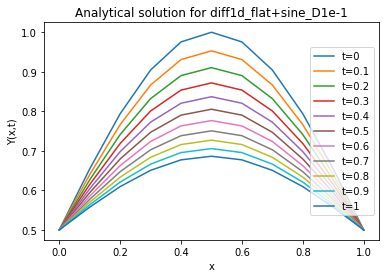

In [7]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## BFGS (default)

In [16]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 197
         Function evaluations: 212
         Gradient evaluations: 212
35 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.638216205380513e-06
 hess_inv: array([[   88.25416841,    39.09172831,    22.57679603, ...,
          -71.00299442,   796.32655403,   342.80344857],
       [   39.09172831,    26.34350893,   -18.14392878, ...,
          -16.49780735,   455.36492398,   175.58030528],
       [   22.57679603,   -18.14392878,   349.86614733, ...,
          169.7900646 ,  -956.32089146,  -450.00519828],
       ...,
       [  -71.00299442,   -16.49780735,   169.79006459, ...,
          558.13648983, -1888.51843375, -1074.13409969],
       [  796.32655403,   455.36492397,  -956.32089145, ...,
        -1888.5184338 , 14620.2919475 ,  6892.02443812],
       [  342.80344857,   175.58030527,  -450.00519828, ...,
        -1074.13409972,  6892.02443809,  3406.37494938]]

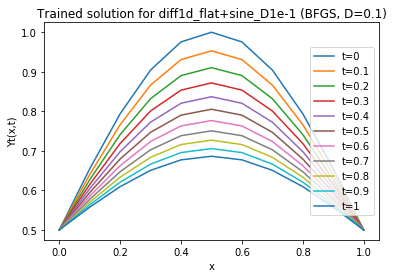

In [17]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1)' % (eq_name, trainalg));

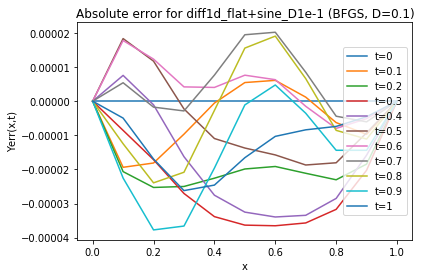

In [18]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1)' % (eq_name, trainalg));

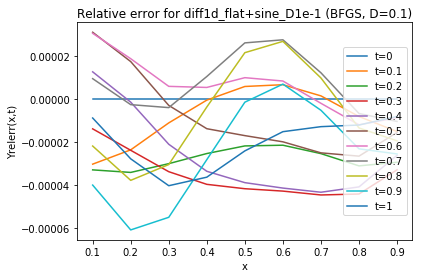

In [19]:
Yrelerr1 = (Yt1[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1)' % (eq_name, trainalg));

## BFGS (default, gtol=1e-6)

In [25]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1108
         Function evaluations: 1211
         Gradient evaluations: 1211
3min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 4.63604434977365e-07
 hess_inv: array([[ 308369.03345788,   -4740.45041924,  -63964.89862575, ...,
          66761.42314537, -290591.90911283, -144717.46625051],
       [  -4740.45136722,    4036.76402453,    5572.30217059, ...,
           3850.01054249,    7328.33782398,    2402.82140713],
       [ -63964.89911111,    5572.30188636,   36986.98030485, ...,
         -15840.20390267,   65453.9584857 ,   27896.04221795],
       ...,
       [  66761.42114087,    3850.01085952,  -15840.20313597, ...,
          26523.94553333,  -66678.38857387,  -35632.12146966],
       [-290591.9076329 ,    7328.33688948,   65453.9576537 , ...,
         -66678.39019615,  308155.55342385,  166902.33999125],
       [-144717.4638082 ,    2402.82091277,   27896

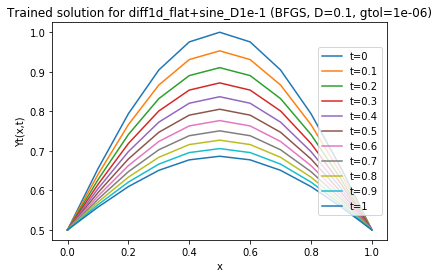

In [26]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

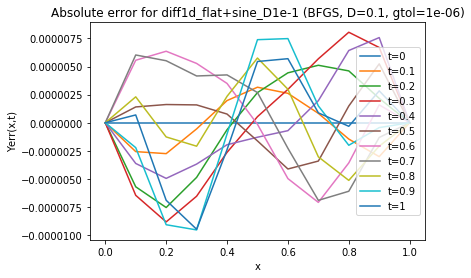

In [27]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

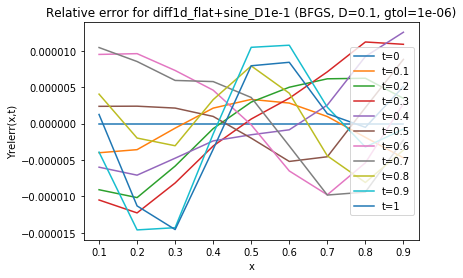

In [28]:
Yrelerr2 = (Yt2[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (default, gtol=1e-8)

In [29]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000000
         Iterations: 8000
         Function evaluations: 8688
         Gradient evaluations: 8688
24min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 1.5198083100810107e-08
 hess_inv: array([[  58665.43360107,   13767.37345786,  -79608.75363551, ...,
         -51809.42129081,   -9259.24380059,   14799.60814   ],
       [  13767.3946306 ,   44973.30124725,  -24004.42531284, ...,
         -58006.78707841,   23332.66189177,   45573.32449267],
       [ -79608.76927102,  -24004.42180152,  176761.77587745, ...,
         176577.66857892,  -65447.6515414 , -112491.77558029],
       ...,
       [ -51809.46967475,  -58006.82349903,  176577.68458259, ...,
         255238.89889524, -168061.92260559, -205648.8801039 ],
       [  -9259.08395329,   23332.80189227,  -65447.70870962, ...,
        -168062.00072976,  701585.50173105,  407300.34209152],
       [  14799.71045935,   45573.38928842, -112491.83091702, ...,
        -205648.915

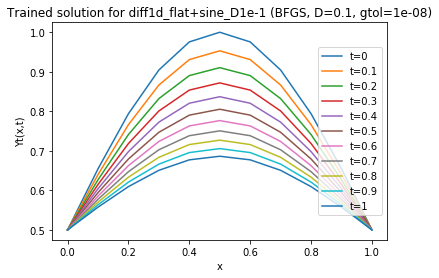

In [30]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

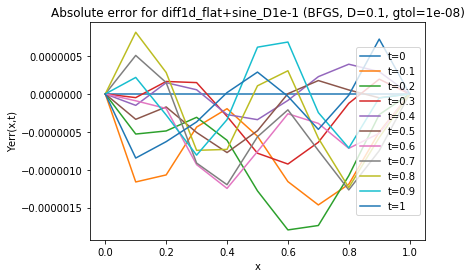

In [31]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

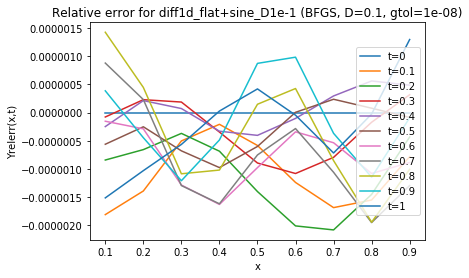

In [32]:
Yrelerr3 = (Yt3[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (default, gtol=1e-8, maxiter=16000)

In [33]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 16000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.000000
         Iterations: 16000
         Function evaluations: 17410
         Gradient evaluations: 17410
51min 17s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 5.738377763119879e-09
 hess_inv: array([[  422265.21657777,  -429834.43416493,   476673.92316603, ...,
          303709.6275174 ,  1669915.76372435,   -92160.83752892],
       [ -429834.47097214,  1224665.1315184 , -1169810.28470844, ...,
         -879447.06200104, -2863213.11388596,   248739.52780709],
       [  476674.04662933, -1169810.92779797,  1356762.09201579, ...,
          964967.62739065,  3219088.51409983,  -181439.17806535],
       ...,
       [  303709.67112985,  -879447.28369735,   964967.42397705, ...,
          720891.56235083,  2262374.11057497,  -138913.8097735 ],
       [ 1669916.0311545 , -2863213.57409351,  3219088.46323473, ...,
         2262374.36622324,  9080244.1643622 ,  -428405.88994869],
       [  -92160.75428756,   248739.42245611,  -181438

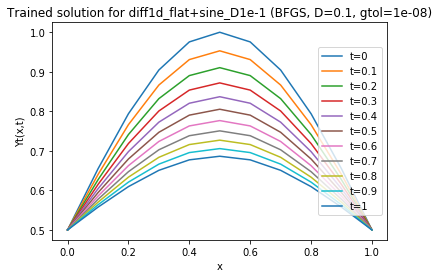

In [34]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

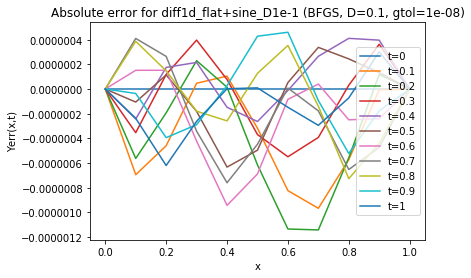

In [35]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

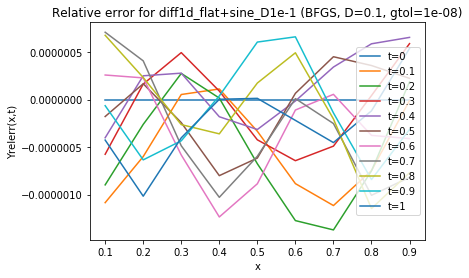

In [36]:
Yrelerr4 = (Yt4[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (default, gtol=1e-8, maxiter=32000)

In [37]:
net5 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-8
options['maxiter'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net5.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net5.res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 19576
         Function evaluations: 21275
         Gradient evaluations: 21275
1h 5min 27s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 2.7556867045558947e-09
 hess_inv: array([[ 1.18052617e+07, -5.40195370e+04, -5.97537598e+06, ...,
        -4.23425012e+06,  1.53128334e+07, -6.42029248e+05],
       [-5.62561699e+04,  2.23224073e+07, -8.56969089e+06, ...,
        -6.41354269e+06,  2.76403185e+07,  2.47661332e+07],
       [-5.97485498e+06, -8.56893391e+06,  2.77499470e+07, ...,
         5.84177064e+06,  3.31639762e+07,  3.35568110e+06],
       ...,
       [-4.23323284e+06, -6.41374072e+06,  5.84162711e+06, ...,
         5.59700122e+06, -8.62169521e+06, -6.98570156e+06],
       [ 1.53092709e+07,  2.76503284e+07,  3.31614539e+07, ...,
        -8.62433551e+06,  2.12017307e+08,  7.01072339e+07],
       [-6.44875572e+05,  2.47666969e+07,  3.35478478e+06, ...,
        -

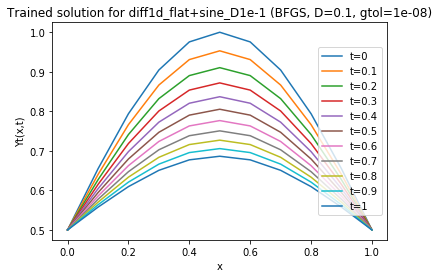

In [38]:
Yt5 = net5.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

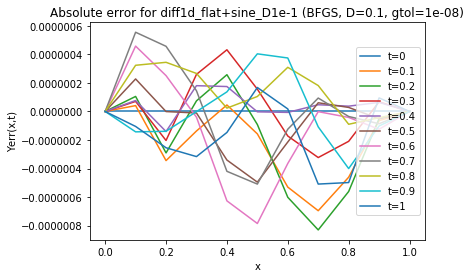

In [39]:
Y_err5 = Yt5 - Ya
for i in range(nt):
    plt.plot(xt, Y_err5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

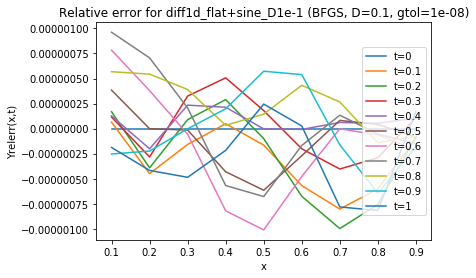

In [40]:
Yrelerr5 = (Yt5[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr5[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

## BFGS (default, gtol=1e-10, maxiter=32000)

In [41]:
net6 = NNPDE2DIFF1D(eq)
trainalg = 'BFGS'
options = {}
options['disp'] = True
options['gtol'] = 1e-10
options['maxiter'] = 32000
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net6.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net6.res)

         Current function value: 0.000000
         Iterations: 26089
         Function evaluations: 28377
         Gradient evaluations: 28366
1h 28min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
      fun: 2.109118433081527e-09
 hess_inv: array([[10875326.5482379 , -3655222.75530352,  5746792.77886952, ...,
        18761297.29090077,  8668995.92400763, -3744240.4794427 ],
       [-3651799.56233238, 20792988.91576327,  3485993.26109998, ...,
        -9320342.44535944,  8731522.00559203, 15263554.75622916],
       [ 5747516.30241062,  3483746.53449903,  8145184.89605114, ...,
        14029813.13391417, 11617950.80711057,  7011096.97056176],
       ...,
       [18763558.87562523, -9326729.93263145, 14029399.49600852, ...,
        51653675.71779023, 23184678.95841791,  1127345.06637972],
       [ 8672390.8948579 ,  8727891.68745773, 11618923.46304309, ...,
        23188630.16234259, 22407728.91461717, 11903304.62421975],
       [-3741360.90880078, 15263630.13621314,  7012

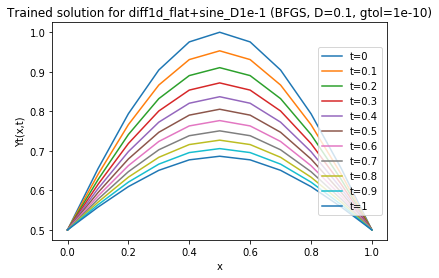

In [42]:
Yt6 = net6.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

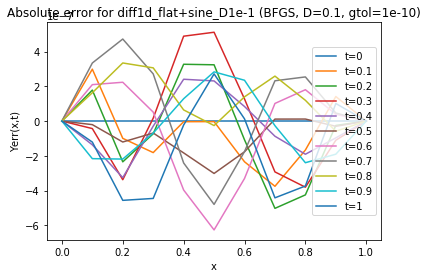

In [43]:
Y_err6 = Yt6 - Ya
for i in range(nt):
    plt.plot(xt, Y_err6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));

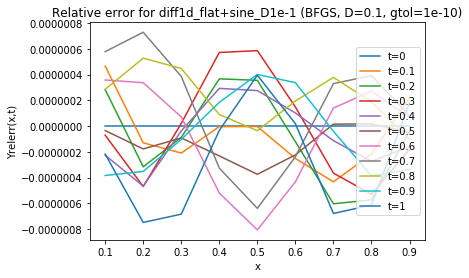

In [44]:
Yrelerr6 = (Yt6[:, 1:-1]-Ya[:, 1:-1])/Ya[:,1:-1]
for i in range(nt):
    plt.plot(xt[1:-1], Yrelerr6[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yrelerr(x,t)')
plt.legend(loc='right')
plt.title('Relative error for %s (%s, D=0.1, gtol=%g)' % (eq_name, trainalg, options['gtol']));